In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
import cv2
import time, os
import numpy as np
from tensorflow.python.keras.utils.data_utils import get_file
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import copy


ModuleNotFoundError: No module named 'cv2'

In [ ]:
np.random.seed(20)

In [ ]:
class Detector:
  def __init__(self):
      pass
  def readClasses(self, classesFilePath):
    with open(classesFilePath, 'r') as f:
      self.classes = f.read().splitlines()
      self.classesList = []

      for i in range(len(self.classes)):
        if self.classes[i] != '':
          self.classesList.append(self.classes[i])

    self.colorList = np.random.uniform(low = 0, high = 255, size = (len(self.classesList), 3))
    print(len(self.classesList), len(self.colorList))
  def downloadModel(self, modelURL):
    fileName = os.path.basename(modelURL)
    self.modelName = fileName[:fileName.index('.')]
    print(fileName)
    print(self.modelName)

    self.cacheDir = "/content/drive/MyDrive/DL Project/pretrained_models"

    os.makedirs(self.cacheDir, exist_ok= True)
    get_file(fname = fileName, origin = modelURL, cache_dir=self.cacheDir, cache_subdir="checkpoints", extract = True)

  def loadModel(self):
    print("Loading model" + self.modelName)
    tf.keras.backend.clear_session()
    self.model = tf.saved_model.load(os.path.join(self.cacheDir, "checkpoints", self.modelName, "saved_model"))

  def BoundingBox(self, image, threshold):
    input = tf.convert_to_tensor(image, dtype = tf.uint8)
    input = input[tf.newaxis, ...]

    detections = self.model(input)

    bb = detections['detection_boxes'][0].numpy()
    classIndexes = detections['detection_classes'][0].numpy().astype(np.int32)
    classScores = detections['detection_scores'][0].numpy()

    H, W, C = image.shape

    bbIdx = tf.image.non_max_suppression(bb, classScores, max_output_size=50, iou_threshold = threshold, score_threshold= 0.5)

    if len(bbIdx) != 0:
      for i in bbIdx:
        bbox = tuple(bb[i].tolist())
        classConfidence = round(100 * classScores[i])
        classIndex = classIndexes[i]

        classLabeltext = self.classesList[classIndex]
        classColor = self.colorList[classIndex]

        displayText = '{}: {}%'.format(classLabeltext, classConfidence)
        ymin, xmin, ymax, xmax = bbox

        xmin, xmax, ymin, ymax = (xmin * W, xmax * W, ymin * H, ymax * H)
        xmin, xmax, ymin, ymax = int(xmin), int(xmax), int(ymin), int(ymax)

        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color = classColor, thickness = 2)
        cv2.putText(image, displayText, (xmin, ymin - 10), cv2.FONT_HERSHEY_PLAIN, 1, classColor, 2)

        lw = min(int((xmax - xmin) * 0.2) , int ((ymax - ymin) * 0.2))

        cv2.line(image, (xmin, ymin), (xmin + lw, ymin), classColor, thickness = 5)
        cv2.line(image, (xmin, ymin), (xmin, ymin+lw), classColor, thickness = 5)

        cv2.line(image, (xmax, ymin), (xmax - lw, ymin), classColor, thickness = 5)
        cv2.line(image, (xmax, ymin), (xmax, ymin+lw), classColor, thickness = 5)


        cv2.line(image, (xmin, ymax), (xmin + lw, ymax), classColor, thickness = 5)
        cv2.line(image, (xmin, ymax), (xmin, ymax - lw), classColor, thickness = 5)

        cv2.line(image, (xmax, ymax), (xmax - lw, ymax), classColor, thickness = 5)
        cv2.line(image, (xmax, ymax), (xmax, ymax - lw), classColor, thickness = 5)




    return image


        



  def predictImage(self, image, threshold):
    Image = self.BoundingBox(image, threshold)
    figure(figsize=(10, 8), dpi=80)

    plt.imshow(Image)
    plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()






In [ ]:
# def change_brightness(image, alpha, beta):
#   new_image = np.zeros(image.shape, np.int64)
#   new_image = np.clip( alpha*image + beta, 0, 255)
#   return new_image


def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
	
def CCP_Attack_Brightness(image, transform):
	img = copy.copy(image)
	for channel in range(img.shape[2]):
		temp1 = image[:,:,0]
		temp2 = image[:,:,1]
		temp3 = image[:,:,2]

		temp = temp1 * transform[channel][0] + temp2 * transform[channel][1] + temp3 * transform[channel][2]

		img[:,:,channel] = temp/3

	img1 = increase_brightness(img, 30)
	return img1

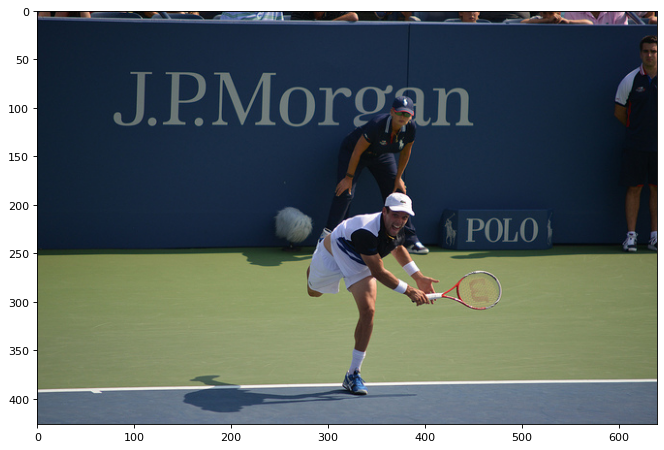

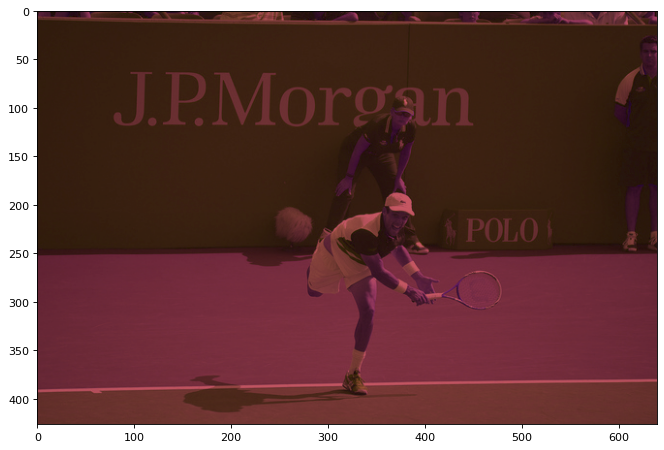

92 92
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8
Loading modelfaster_rcnn_resnet50_v1_640x640_coco17_tpu-8


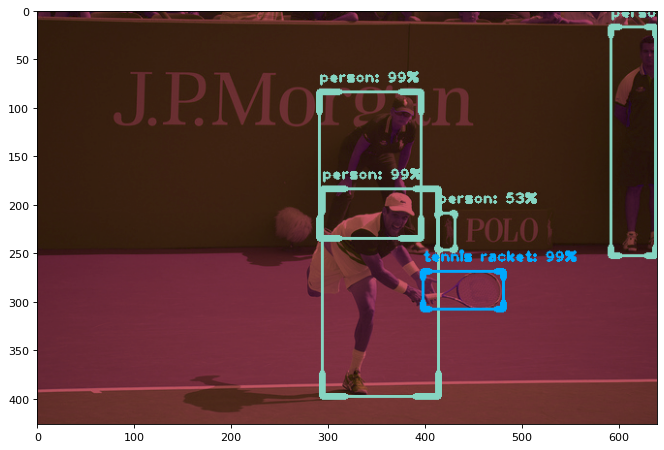

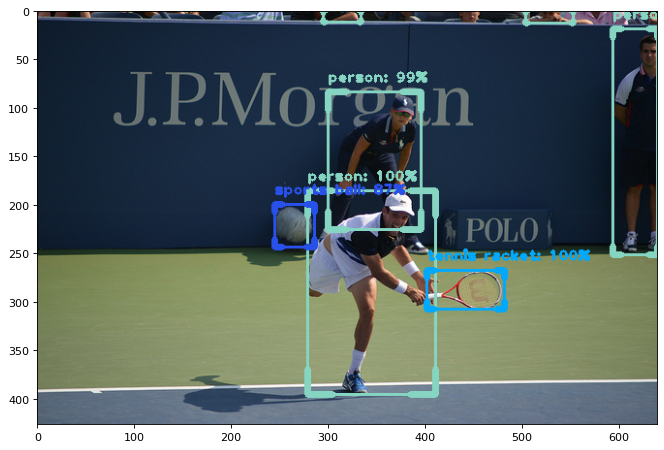

In [ ]:
classFile = '/content/drive/MyDrive/DL Project/text.txt'
modelURL = "http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz"
imagePath = "/content/drive/MyDrive/DL Project/test_images/image2.jpeg"
image = cv2.imread(imagePath)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plt.imshow(image)
plt.show() 
print("\n")
a = np.random.uniform(low=0.0, high=1.0, size=(3,))
b = np.random.uniform(low=0.0, high=1.0, size=(3,))
c = np.random.uniform(low=0.0, high=1.0, size=(3,))
transform = np.array([a,b,c]) 



image_attacked = CCP_Attack_Brightness(image, transform)
figure(figsize=(10, 8), dpi=80)

plt.imshow(image_attacked) 
plt.show()
threshold = 0.3
detector = Detector()
detector.readClasses(classFile)
detector.downloadModel(modelURL)
detector.loadModel()
detector.predictImage(image_attacked, threshold)
detector.predictImage(image, threshold)

